In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression

LOAD DATA

In [ ]:
#Train Data
train_cat=pd.read_excel(r'C:\Users\LENOVO\Downloads\widsdatathon2025\TRAIN_NEW\TRAIN_CATEGORICAL_METADATA_new.xlsx')
train_quant=pd.read_excel(r'C:\Users\LENOVO\Downloads\widsdatathon2025\TRAIN_NEW\TRAIN_QUANTITATIVE_METADATA_new.xlsx')
train_connect=pd.read_csv(r'C:\Users\LENOVO\Downloads\widsdatathon2025\TRAIN_NEW\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')
#train_sample=pd.read_excel(r'C:\Users\LENOVO\Downloads\widsdatathon2025\TRAIN_NEW\TRAINING_SOLUTIONS.xlsx')
#Test Data
test_cat=pd.read_excel(r'C:\Users\LENOVO\Downloads\widsdatathon2025\TEST\TEST_CATEGORICAL.xlsx')
test_quant=pd.read_excel(r'C:\Users\LENOVO\Downloads\widsdatathon2025\TEST\TEST_QUANTITATIVE_METADATA.xlsx')
test_connect=pd.read_csv(r'C:\Users\LENOVO\Downloads\widsdatathon2025\TEST\TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')

NameError: name 'pd' is not defined

In [4]:
train_data=pd.concat([train_cat,train_quant],ignore_index=True)
test_data=pd.concat([test_cat,test_quant],ignore_index=True)

PREPROCESSING

In [5]:
#Check for data distribution/skewnsess
train_data.describe()
test_cat.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,304.000000,304.000000,301.000000,298.000000,304.000000,303.000000,303.000000,268.000000,262.000000
mean,2022.197368,4.009868,0.355482,2.231544,3.638158,19.128713,29.389439,18.458955,35.763359
std,0.494718,0.099012,0.665741,3.392914,0.481326,2.680553,16.484193,3.087093,11.978162
min,2019.000000,4.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,0.000000
25%,2022.000000,4.000000,0.000000,0.000000,3.000000,18.000000,25.000000,18.000000,30.000000
50%,2022.000000,4.000000,0.000000,0.000000,4.000000,21.000000,35.000000,18.000000,40.000000
75%,2022.000000,4.000000,1.000000,3.000000,4.000000,21.000000,45.000000,21.000000,45.000000
max,2023.000000,5.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


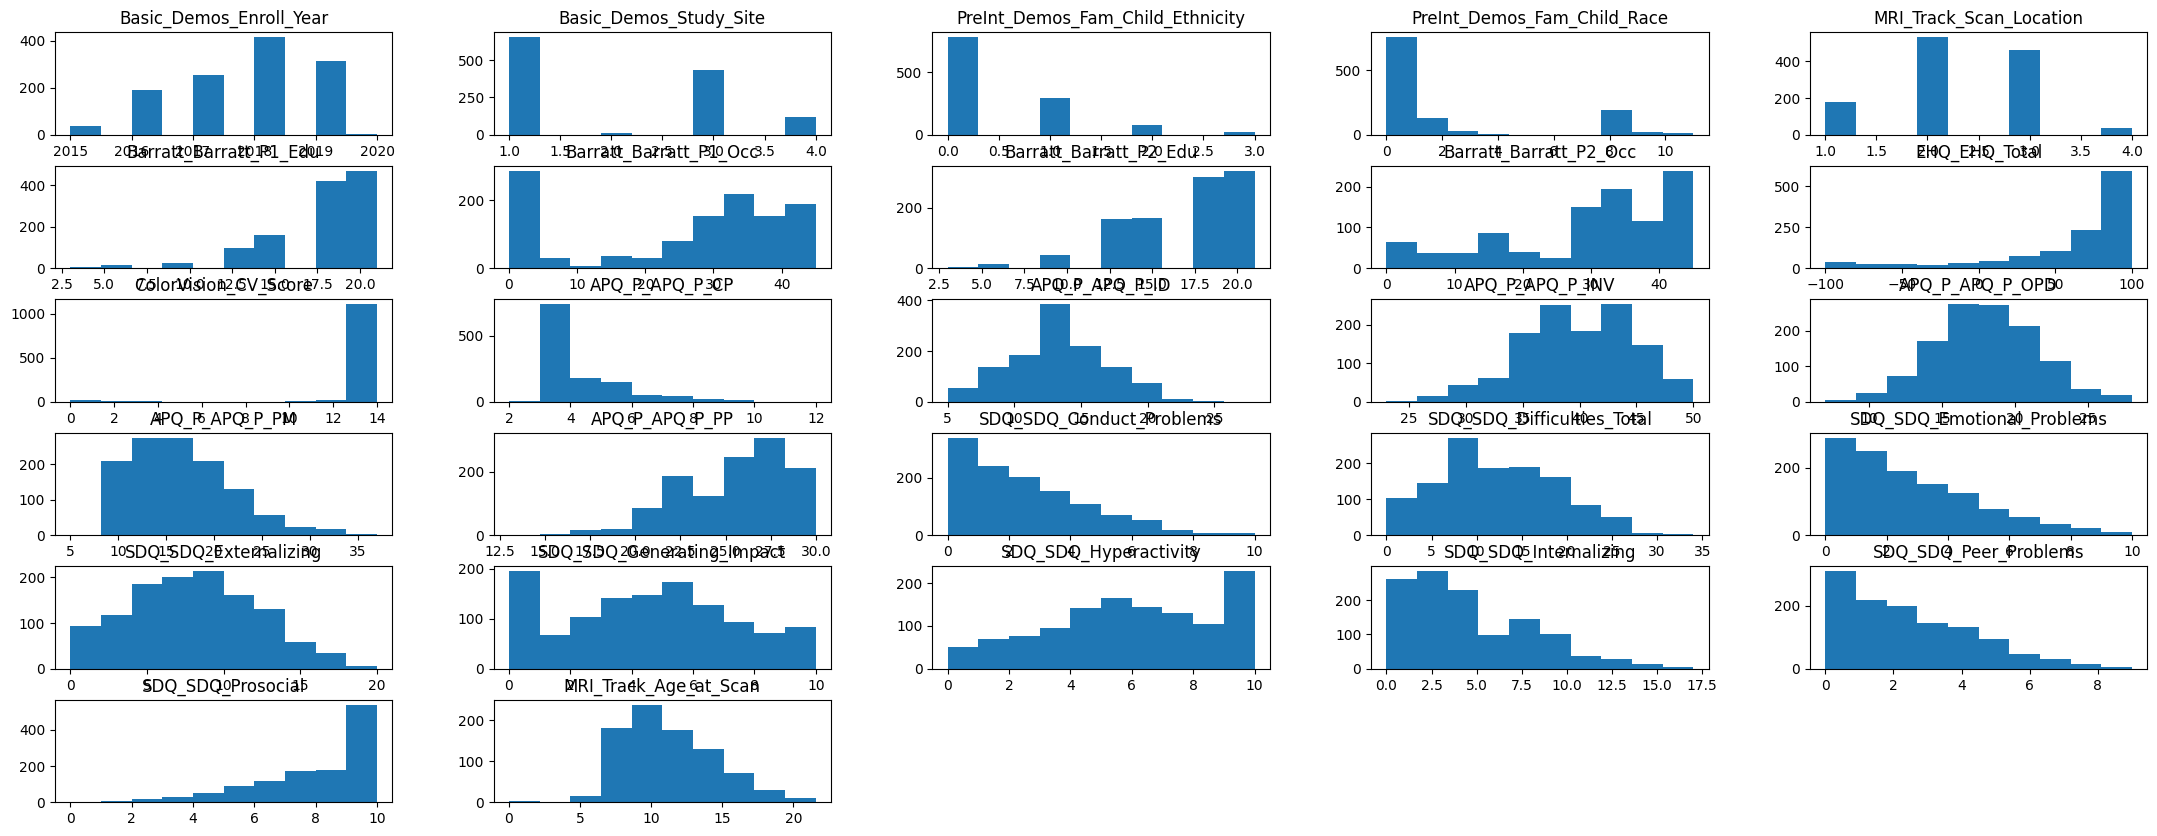

In [6]:
train_data.hist(figsize=(27, 10), bins=10, grid=False)
plt.show()

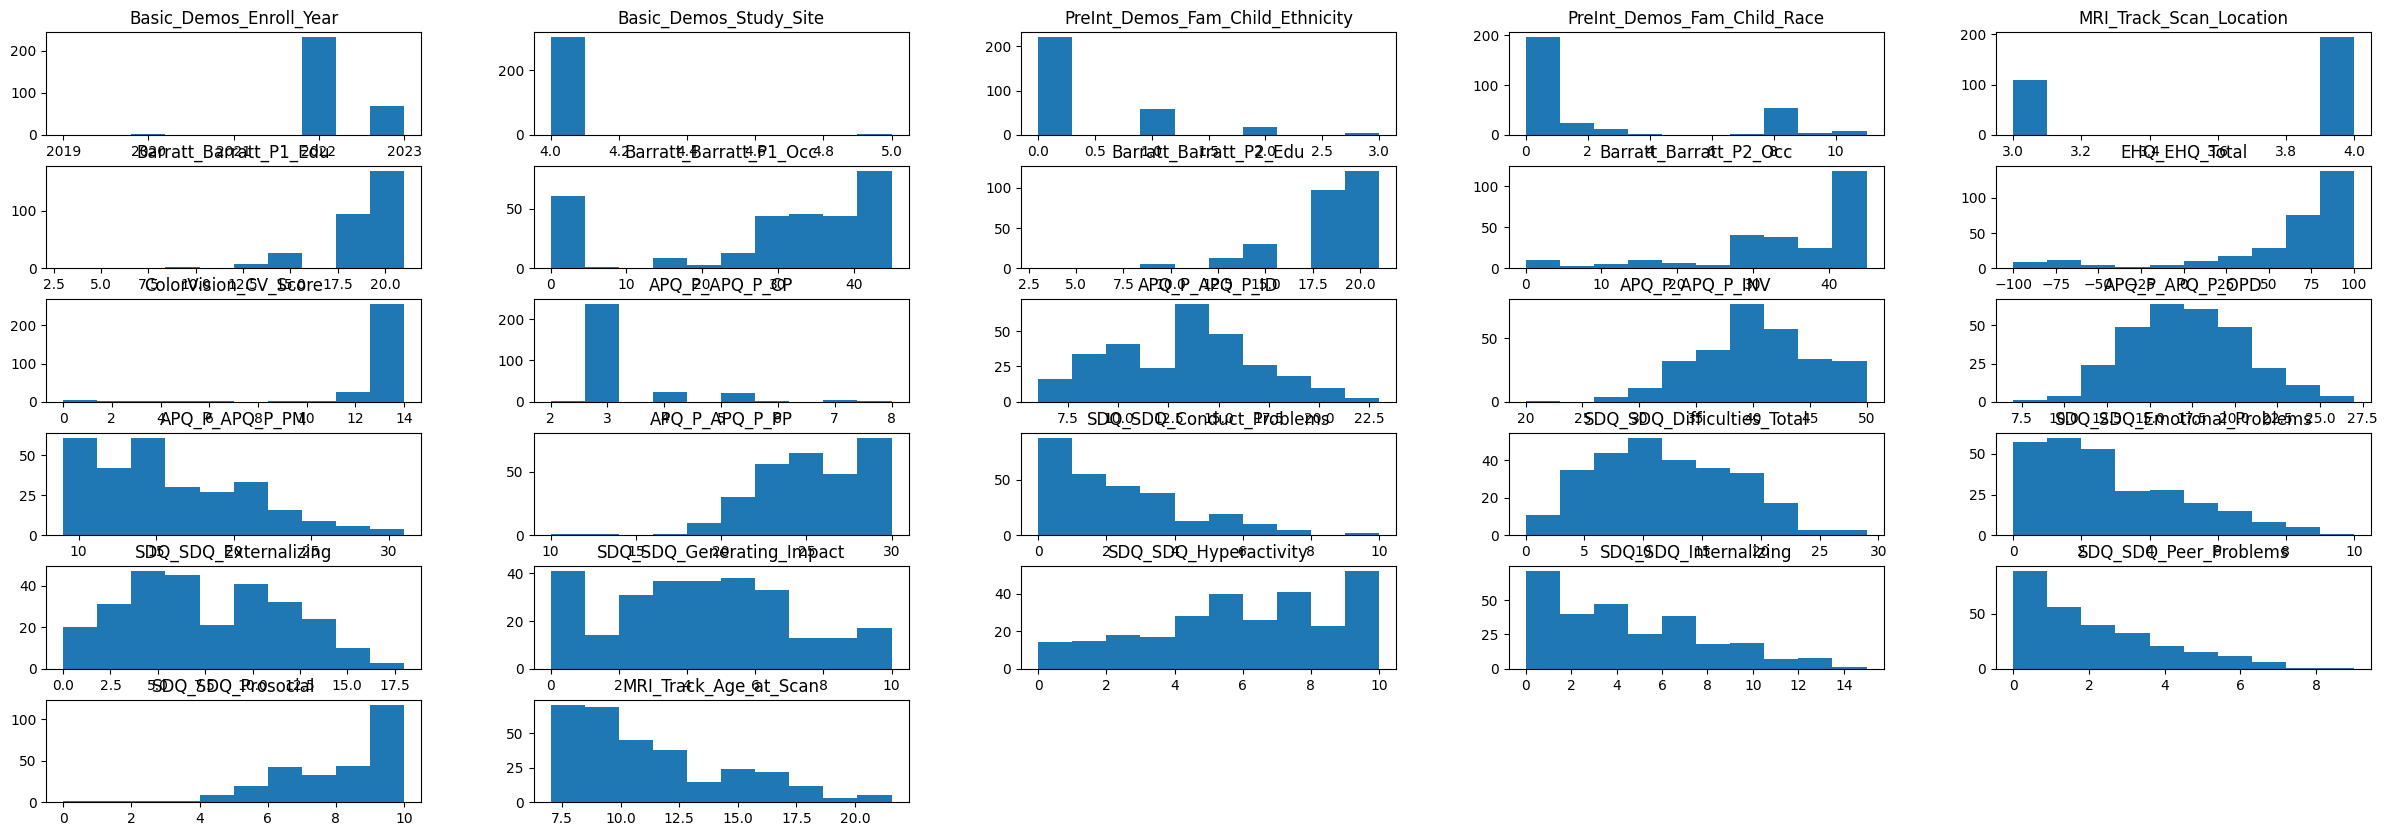

In [7]:
test_data.hist(figsize=(30, 10), bins=10, grid=False)
plt.show()

In [8]:
#Impute missing values- IMPORTANT
# Identify numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=['number']).columns
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns

# Using Iterative Imputer (like regression-based imputation)
iter_imputer = IterativeImputer()
train_data[numerical_cols] = iter_imputer.fit_transform(train_data[numerical_cols])


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [9]:
# Identify numerical and categorical columns -IMPORTANT
numerical_cols = test_data.select_dtypes(include=['number']).columns
categorical_cols = test_data.select_dtypes(include=['object', 'category']).columns

# Using Iterative Imputer (like regression-based imputation)
iter_imputer = IterativeImputer()
test_data[numerical_cols] = iter_imputer.fit_transform(test_data[numerical_cols])


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: >

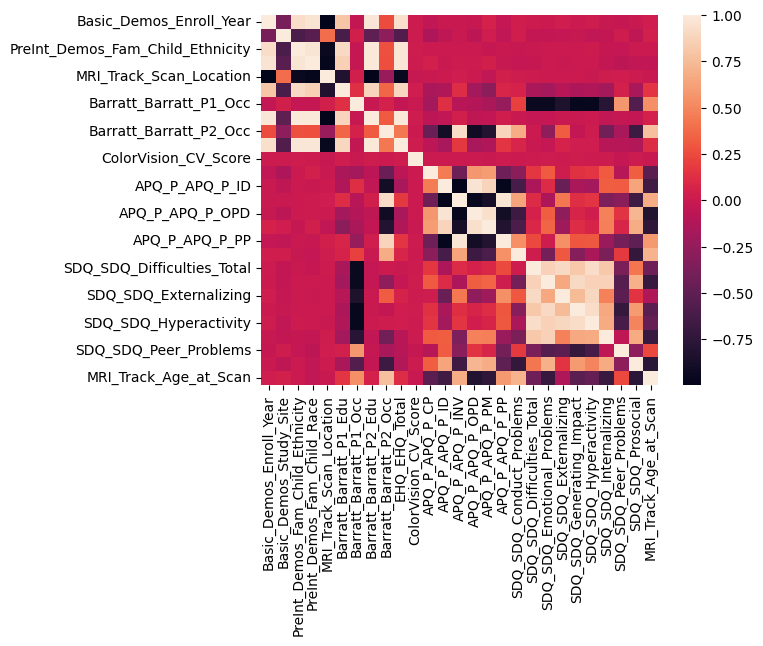

In [10]:
# Use train_copy (or train_copy_cleaned if applicable) instead of train_data
train_corr = train_data.select_dtypes(['number']).corr()
sns.heatmap(train_corr)

In [11]:
train_copy=train_data.copy()
test_copy=test_data.copy()
train_copy.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

FEATURE ENGINEERING

In [12]:
sex_features=[
       'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'
]

kmeans_sex = KMeans(n_clusters=2, random_state=42)
sex_clusters = kmeans_sex.fit_predict(train_copy[sex_features])

train_copy['Sex_F'] = sex_clusters


adhd_features = [
       'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'
]

kmeans_adhd = KMeans(n_clusters=2, random_state=42)
adhd_clusters = kmeans_adhd.fit_predict(train_copy[adhd_features])

train_copy['ADHD_Outcome'] = adhd_clusters

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler  # Make sure to install imblearn
import numpy as np

# Step 1: Prepare training and test sets
X = train_copy.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])
y_adhd = train_copy['ADHD_Outcome']
y_sex = train_copy['Sex_F']
X_test = test_copy.drop(columns=['participant_id'])

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train-validation split
X_train, X_val, y_train_adhd, y_val_adhd = train_test_split(X_scaled, y_adhd, test_size=0.2, random_state=42)
_, _, y_train_sex, y_val_sex = train_test_split(X_scaled, y_sex, test_size=0.2, random_state=42)

# Step 4: Undersampling
rus = RandomOverSampler(random_state=42)

X_train_adhd_balanced, y_train_adhd_balanced = rus.fit_resample(X_train, y_train_adhd)
X_train_sex_balanced, y_train_sex_balanced = rus.fit_resample(X_train, y_train_sex)

# Step 5: Random Forest models (no class_weight needed since we're balancing manually)
rf_adhd = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_sex = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Step 6: Fit the models on the undersampled data
rf_adhd.fit(X_train_adhd_balanced, y_train_adhd_balanced)
rf_sex.fit(X_train_sex_balanced, y_train_sex_balanced)

# Step 7: Predict on validation
y_pred_adhd = rf_adhd.predict(X_val)  # Use predict to get class labels
y_pred_sex = rf_sex.predict(X_val)   # Use predict to get class labels

# Step 8: Evaluate performance
print("ADHD Outcome Prediction Results:")
print("Accuracy:", accuracy_score(y_val_adhd, y_pred_adhd))
print(classification_report(y_val_adhd, y_pred_adhd))

print("Sex Prediction Results:")
print("Accuracy:", accuracy_score(y_val_sex, y_pred_sex))
print(classification_report(y_val_sex, y_pred_sex))

ADHD Outcome Prediction Results:
Accuracy: 0.9979423868312757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      0.99      1.00       114

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486

Sex Prediction Results:
Accuracy: 0.9979423868312757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      0.99      1.00       114

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



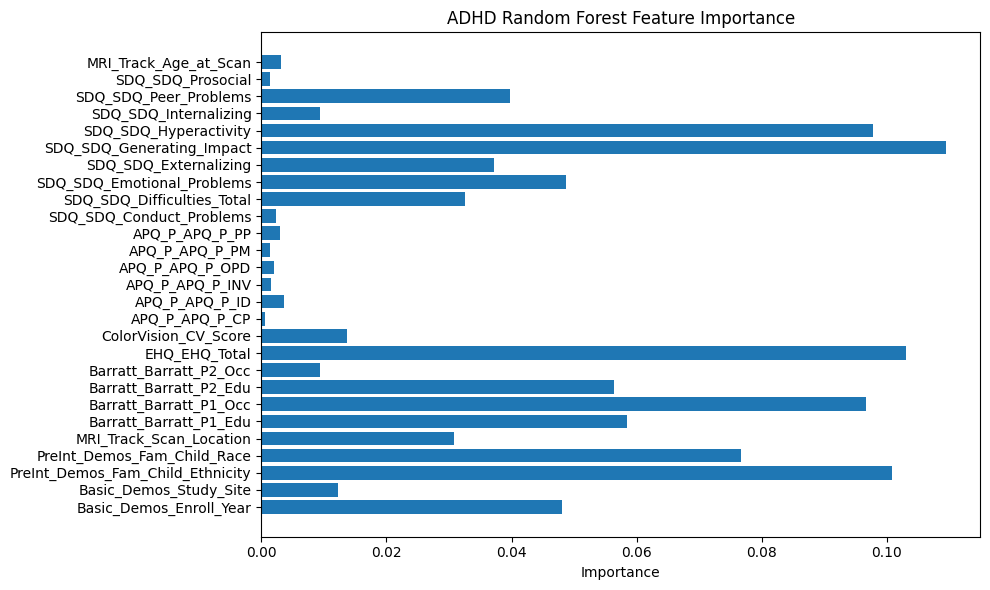

In [14]:

# Get feature importances
importances = rf_adhd.feature_importances_
feature_names = train_copy.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F']).columns

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('ADHD Random Forest Feature Importance')
plt.tight_layout()
plt.show()


In [15]:
# Sort by importance
feat_imp_adhd = pd.DataFrame(importances, index=feature_names, columns=['Importance'])
feat_imp_adhd= feat_imp_adhd.sort_values(by='Importance', ascending=False)

# Select top N (e.g., top 10)
top_features = feat_imp_adhd.head(24).index

# Display like an Index object
print(pd.Index(top_features))


Index(['SDQ_SDQ_Generating_Impact', 'EHQ_EHQ_Total',
       'PreInt_Demos_Fam_Child_Ethnicity', 'SDQ_SDQ_Hyperactivity',
       'Barratt_Barratt_P1_Occ', 'PreInt_Demos_Fam_Child_Race',
       'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P2_Edu',
       'SDQ_SDQ_Emotional_Problems', 'Basic_Demos_Enroll_Year',
       'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Difficulties_Total', 'MRI_Track_Scan_Location',
       'ColorVision_CV_Score', 'Basic_Demos_Study_Site',
       'Barratt_Barratt_P2_Occ', 'SDQ_SDQ_Internalizing', 'APQ_P_APQ_P_ID',
       'MRI_Track_Age_at_Scan', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_INV'],
      dtype='object')


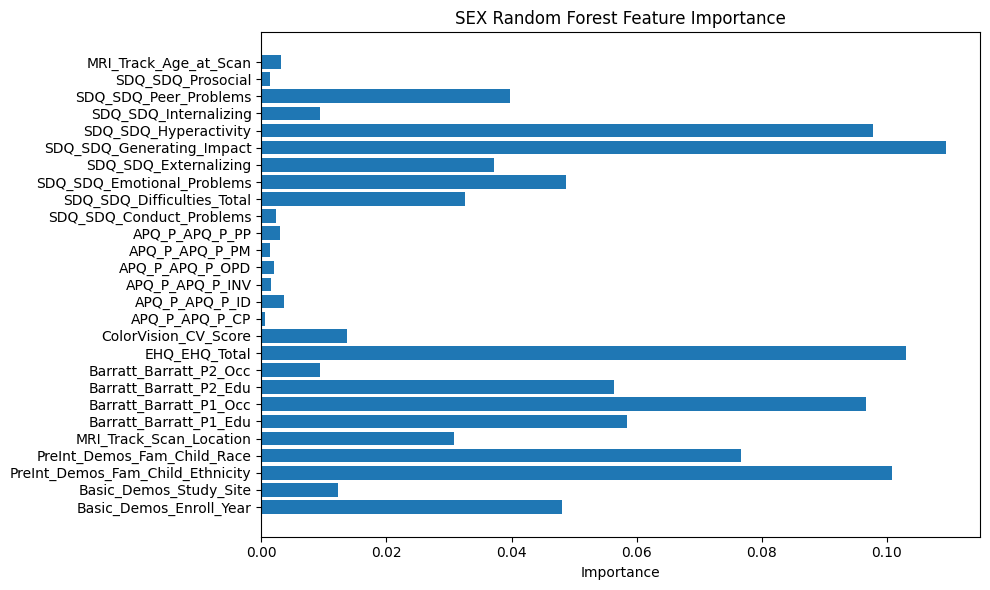

In [16]:


# Get feature importances
importancez = rf_sex.feature_importances_
feature_namez = train_copy.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F']).columns

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_namez, importancez)
plt.xlabel('Importance')
plt.title('SEX Random Forest Feature Importance')
plt.tight_layout()
plt.show()


In [17]:
# Sort by importance
feat_imp_sex = pd.DataFrame(importancez, index=feature_namez, columns=['Importance'])
feat_imp_sex = feat_imp_sex.sort_values(by='Importance', ascending=False)

# Select top N (e.g., top 10)
top_features = feat_imp_sex.head(24).index

# Display like an Index object
print(pd.Index(top_features))


Index(['SDQ_SDQ_Generating_Impact', 'EHQ_EHQ_Total',
       'PreInt_Demos_Fam_Child_Ethnicity', 'SDQ_SDQ_Hyperactivity',
       'Barratt_Barratt_P1_Occ', 'PreInt_Demos_Fam_Child_Race',
       'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P2_Edu',
       'SDQ_SDQ_Emotional_Problems', 'Basic_Demos_Enroll_Year',
       'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Difficulties_Total', 'MRI_Track_Scan_Location',
       'ColorVision_CV_Score', 'Basic_Demos_Study_Site',
       'Barratt_Barratt_P2_Occ', 'SDQ_SDQ_Internalizing', 'APQ_P_APQ_P_ID',
       'MRI_Track_Age_at_Scan', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_INV'],
      dtype='object')


Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_adhd_balanced, y_train_adhd_balanced)
best_rf_adhd = grid_search.best_estimator_
best_rf_adhd

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2',None]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_sex_balanced, y_train_sex_balanced)
best_rf_sex = grid_search.best_estimator_
best_rf_sex

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Common param grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# ADHD model tuning
rf_adhd = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_adhd = GridSearchCV(rf_adhd, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_adhd.fit(X_train_adhd_balanced, y_train_adhd_balanced)
best_rf_adhd = grid_adhd.best_estimator_

# SEX model tuning
rf_sex = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_sex = GridSearchCV(rf_sex, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_sex.fit(X_train_sex_balanced, y_train_sex_balanced)
best_rf_sex = grid_sex.best_estimator_

# Evaluate on validation
y_pred_adhd = best_rf_adhd.predict(X_val)
y_pred_sex = best_rf_sex.predict(X_val)

# Results
print("Best Parameters (ADHD):", grid_adhd.best_params_)
print("ADHD Accuracy:", accuracy_score(y_val_adhd, y_pred_adhd))
print(classification_report(y_val_adhd, y_pred_adhd))

print("Best Parameters (Sex):", grid_sex.best_params_)
print("Sex Accuracy:", accuracy_score(y_val_sex, y_pred_sex))
print(classification_report(y_val_sex, y_pred_sex))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters (ADHD): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
ADHD Accuracy: 0.9979423868312757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      0.99      1.00       114

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486

Best Parameters (Sex): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Sex Accuracy: 0.9979423868312757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      0.99      1.00       114

    accuracy                           1.00       4

CROSS VALIDATION

In [105]:
from sklearn.model_selection import cross_val_score

# Cross-validation for ADHD model
cv_scores_adhd = cross_val_score(rf_adhd, X_scaled, y_adhd, cv=5, scoring='accuracy')
print(f"Cross-validation scores for ADHD model: {cv_scores_adhd}")
print(f"Mean cross-validation score for ADHD: {cv_scores_adhd.mean()}")

# Cross-validation for Sex model
cv_scores_sex = cross_val_score(rf_sex, X_scaled, y_sex, cv=5, scoring='accuracy')
print(f"Cross-validation scores for Sex model: {cv_scores_sex}")
print(f"Mean cross-validation score for Sex: {cv_scores_sex.mean()}")


Cross-validation scores for ADHD model: [0.99176955 0.99587629 0.99381443 0.98762887 0.99793814]
Mean cross-validation score for ADHD: 0.9934054558567732
Cross-validation scores for Sex model: [0.99176955 0.99587629 0.99381443 0.98762887 0.99793814]
Mean cross-validation score for Sex: 0.9934054558567732


FINAL OUTPUT

In [119]:
# Prepare the final output DataFrame for predictions on the test set
final_output = pd.DataFrame({
    'participant_id': test_copy['participant_id'],  # Assuming 'participant_id' exists in 'test_copy'
    'ADHD_Outcome': rf_adhd.predict(test_copy.drop(columns=['participant_id'])),
    'Sex_F': rf_sex.predict(test_copy.drop(columns=['participant_id']))
})

# Use iloc to limit the output to the first 304 rows
final_output = final_output.iloc[:304]
# Drop duplicates, ensuring unique participant IDs
final_output = final_output.drop_duplicates()

# Use iloc to limit the output to the first 304 rows

# Save the final output DataFrame to a CSV file
final_output.to_csv('final_predictions_cleaned3.csv', index=False)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [55]:
# Check unique participant_id count
unique_participant_ids = final_output['participant_id'].nunique()
print(f"Unique participant_id count: {unique_participant_ids}")


Unique participant_id count: 304


In [56]:
final_output.shape

(304, 3)

In [120]:
final_output['Sex_F'].value_counts(normalize=True) 

Sex_F
1    0.628289
0    0.371711
Name: proportion, dtype: float64

In [111]:
train_sample['Sex_F'].value_counts(normalize=True)

Sex_F
1    0.509868
0    0.490132
Name: proportion, dtype: float64

In [112]:
train_sample['ADHD_Outcome'].value_counts(normalize=True)

ADHD_Outcome
1    0.546053
0    0.453947
Name: proportion, dtype: float64

In [121]:
final_output['ADHD_Outcome'].value_counts(normalize=True) 

ADHD_Outcome
1    0.628289
0    0.371711
Name: proportion, dtype: float64

In [114]:
print("Rows in test_copy:", test_copy.shape[0])
print("Unique participant_id count:", test_copy['participant_id'].nunique())


Rows in test_copy: 608
Unique participant_id count: 304
